In [1]:
import random
import numpy as np 
from functools import reduce 
import typing
from copy import deepcopy
import matplotlib.pyplot as plt
from class_tree import *
from similarity import *
from transformation import *
from simGen import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Combal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Combal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Combal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from datetime import datetime
dates = [
    '2006-10-28', '2005-11-15', '1936-11-07', '1955-09-08', '1936-12-07',
    '1937-04-12', '1974-12-02', '1972-06-30', '1955-07-06', '2006-09-09',
    '2007-11-06', '2007-11-13', '2009-09-29', '2014-03-25', '2001-12-04',
    '2004-09-06', '2004-11-10', '2004-11-23', '2004-12-09', '2005-09-27',
    '2011-09-27', '2000-09-12', '1999-09-14', '2003-11-11', '2004-02-05',
    '2006-04-04', '2005-11-16', '2005-11-24', '2008-09-23', '2010-10-19',
    '2005-09-13', '2005-09-14', '2006-03-07', '2009-09-08', '2011-11-01',
    '2003-06-03', '1969-02-10', '2017-04-28', '2022-10-24', '2004-05-10',
    '2018-03-14', '2002-04-11', '2013-03-09'
]

american_dates = []
european_dates = []

for date_str in dates:
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    american_date = date_obj.strftime('%m/%d/%Y - GMT+1:%H.%M.%S')
    american_dates.append(american_date)
    european_date = date_obj.strftime('%d/%m/%Y')
    european_dates.append(european_date)

# Print the converted dates
values_date = []
for a,e in zip(american_dates,european_dates):
    #print(a+" - "+e)
    values_date.append((a,e))

In [3]:
addresses = [
    '1234 Elm Street','567 Maple Avenue','789 Oak Drive','1011 Pine Lane','1213 Cedar Court','1415 Birch Road','1617 Willow Way','1819 Aspen Circle','2021 Juniper Street','2223 Spruce Avenue','2425 Alder Drive','2627 Chestnut Lane',
    '2829 Poplar Court','3031 Magnolia Road','3233 Laurel Way','3435 Acacia Circle','3637 Sycamore Street','3839 Hickory Avenue','4041 Pinecone Drive','4243 Cedar Lane','4445 Birch Court',
    '4647 Willow Road','4849 Aspen Way','5051 Juniper Avenue','5253 Spruce Drive','5455 Alder Court','5657 Chestnut Street','5859 Poplar Avenue','6061 Magnolia Lane','6263 Laurel Circle','6465 Acacia Road',
    '6667 Sycamore Way','6869 Hickory Court','7071 Pinecone Street','7273 Cedar Avenue','7475 Birch Drive','7677 Willow Lane','7879 Aspen Court','8081 Juniper Road','8283 Spruce Way',
    '8485 Alder Circle','8687 Chestnut Avenue','8889 Poplar Drive','9091 Magnolia Court','9293 Laurel Street','9495 Acacia Lane','9697 Sycamore Avenue','9899 Hickory Road','100101 Pinecone Way','102103 Cedar Court']

def add_noise(address):
    address_parts = address.split()
    for i in range(len(address_parts)):
        part = address_parts[i]
        if part.isdigit():
            # Modify the numbers by adding or subtracting a small random value
            num = int(part)
            noise = random.randint(-5, 5)
            address_parts[i] = str(num + noise)
        else:
            # Modify the names by randomly replacing a character with another
            modified_part = ''
            for char in part:
                if random.random() < 0.1:  # 10% chance of modification
                    modified_part += random.choice('abcdefghijklmnopqrstuvwxyz')
                else:
                    modified_part += char
            address_parts[i] = modified_part
    return ' '.join(address_parts)

noisy_addresses = [add_noise(address) for address in addresses]

# Print the converted dates
values_adress = []
for a,e in zip(noisy_addresses,addresses):
    #print(a+" - "+e)
    values_adress.append((a,e))

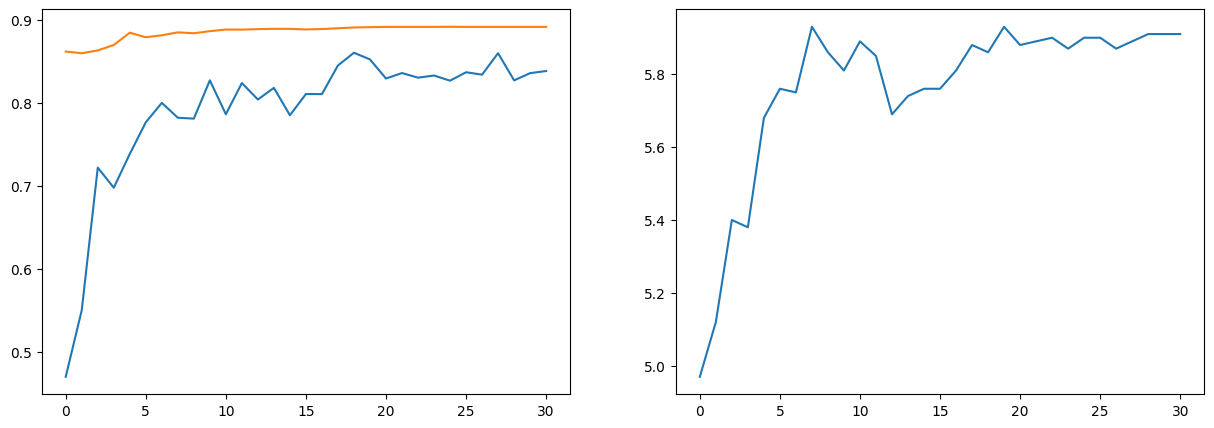

In [6]:
param_algo = {
    "population_size" : 100,
    "nb_generation"   : 30,
    "proba_selection" : 0.5,
    "proba_crossover" : 0.15,
    "proba_mutation"  : 0.3,
    "size_regularisation" : 0.5,
    "top_k" : 15,
    "threshold" : 0.95
}

param_data = {
    "tree_max_depth" : 6,
    "similarity_functions" : similarity_functions(),
    "transformation_functions" : transformation_functions(),
    "values" : values_adress
}


sim = SimGen(param_algo,param_data)
sim.evolve_population()
plot_stats_sim(sim)

In [9]:
(index := list(np.argsort(sim.population_similarity))).reverse()
for i in index:
    print(sim.population_similarity[i],sim.population[i])


0.8915953455156242 ['jaro_similarity', ['flatten', ['strip_whitespace', ['lowercase', ['remove_stopwords', '102101 Cedau oours']]]], ['remove_punctuation', ['lowercase', ['flatten', '102103 Cedar Court']]]]
0.8915953455156242 ['jaro_similarity', ['flatten', ['strip_whitespace', ['lowercase', ['remove_stopwords', '102101 Cedau oours']]]], ['lowercase', ['flatten', '102103 Cedar Court']]]
0.8915953455156242 ['jaro_similarity', ['flatten', ['strip_whitespace', ['lowercase', ['remove_stopwords', '102101 Cedau oours']]]], ['remove_punctuation', ['lowercase', ['flatten', '102103 Cedar Court']]]]
0.8915953455156242 ['jaro_similarity', ['flatten', ['strip_whitespace', ['lowercase', ['remove_stopwords', '102101 Cedau oours']]]], ['lowercase', ['flatten', '102103 Cedar Court']]]
0.8915953455156242 ['jaro_similarity', ['flatten', ['strip_whitespace', ['lowercase', ['remove_stopwords', '102101 Cedau oours']]]], ['lowercase', ['flatten', '102103 Cedar Court']]]
0.8915953455156242 ['jaro_similarity'